In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [ ]:
temp = pd.read_csv('deter_data_clinical.csv', sep=";")
temp.head()

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score,condition
0,55,2,2,0,49.0,2.0,2,0,6,MED_OFF_STIM_OFF
1,79,2,3,0,75.0,4.0,2,0,5,MED_OFF_STIM_OFF
2,65,3,4,1,439.0,34.0,2,6,9,MED_OFF_STIM_OFF
3,75,4,4,4,258.0,19.0,5,6,16,MED_OFF_STIM_OFF
4,59,2,3,3,111.0,16.0,4,32,8,MED_OFF_STIM_OFF


In [ ]:
temp.condition.unique()

array(['MED_OFF_STIM_OFF', 'MED_OFF_STIM_ON', 'MED_ON_STIM_OFF',
       'MED_ON_STIM_ON', 'MED_ON_STIM_ON_60Hz'], dtype=object)

In [ ]:
temp['meanDetSWS_time_s'] = temp['DetSWS_time_s'].groupby(temp['condition']).transform('mean')
temp

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score,condition,meanDetSWS_time_s
0,55,2,2,0,49.0,2.0,2,0,6,MED_OFF_STIM_OFF,231.115733
1,79,2,3,0,75.0,4.0,2,0,5,MED_OFF_STIM_OFF,231.115733
2,65,3,4,1,439.0,34.0,2,6,9,MED_OFF_STIM_OFF,231.115733
3,75,4,4,4,258.0,19.0,5,6,16,MED_OFF_STIM_OFF,231.115733
4,59,2,3,3,111.0,16.0,4,32,8,MED_OFF_STIM_OFF,231.115733
...,...,...,...,...,...,...,...,...,...,...,...
80,44,2,4,0,166.0,12.0,3,12,8,MED_ON_STIM_ON_60Hz,82.308821
81,29,2,2,0,55.0,4.0,2,20,4,MED_ON_STIM_ON_60Hz,82.308821
82,39,2,2,0,17.0,1.0,2,0,4,MED_ON_STIM_ON_60Hz,82.308821
83,42,2,1,0,25.0,1.0,2,4,3,MED_ON_STIM_ON_60Hz,82.308821


In [ ]:
temp.DetSWS_time_s.min()

17.0

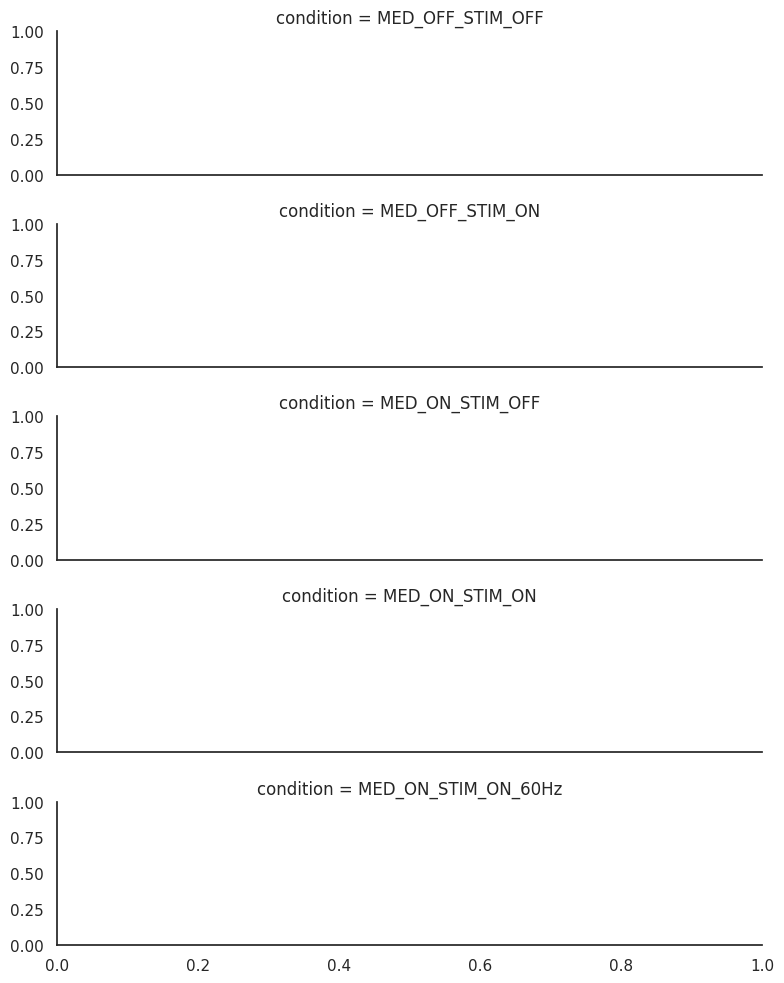

In [ ]:

pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
g = sns.FacetGrid(temp, row="condition", hue="condition", aspect=4, height=2, palette=pal)


In [ ]:
g.map(sns.kdeplot, "DetSWS_time_s",
      bw_adjust=.3, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "DetSWS_time_s", clip_on=False, color="w", lw=2, bw_adjust=.3)


In [ ]:
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


In [ ]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.8, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "DetSWS_time_s")

In [ ]:
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.refline(x = temp.DetSWS_time_s.mean(),
          color = "red",
         lw = 3)
g.set(yticks=[], ylabel="", xlim=(0, 600))
g.despine(bottom=True, left=True)

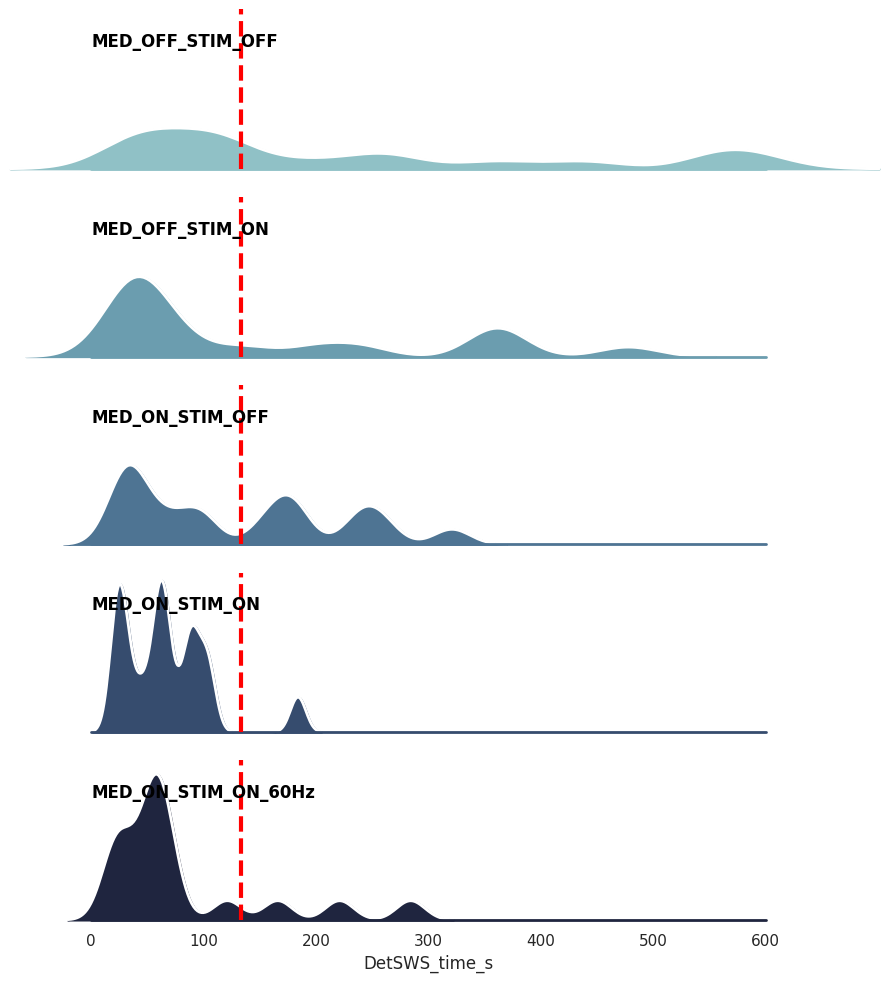

In [ ]:
plt.show()


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [10]:
temp = pd.read_csv('deter_data_clinical.csv', sep=";")
temp.head()

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,DetAXIAL_score,condition
0,55,2,2,0,49.0,2.0,2,0,6,Med_OFF_Stim_OFF
1,79,2,3,0,75.0,4.0,2,0,5,Med_OFF_Stim_OFF
2,65,3,4,1,439.0,34.0,2,6,9,Med_OFF_Stim_OFF
3,75,4,4,4,258.0,19.0,5,6,16,Med_OFF_Stim_OFF
4,59,2,3,3,111.0,16.0,4,32,8,Med_OFF_Stim_OFF


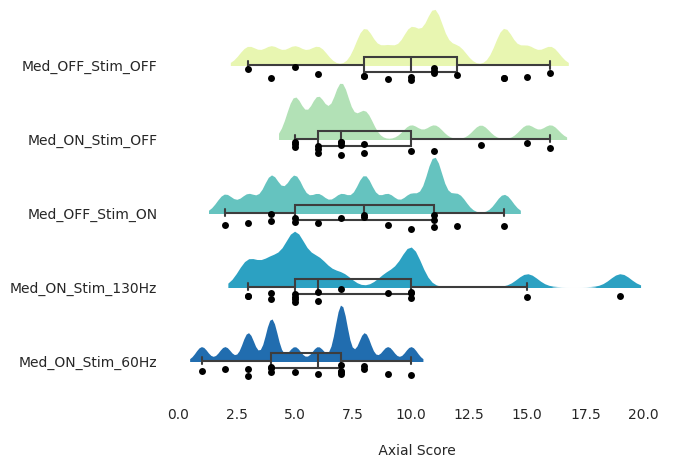

In [16]:
sns.set_style('white')
#palette = sns.cubehelix_palette(n_colors=5, start=1, rot=-.9, dark=0.3, light=0.7)
palette = sns.color_palette("YlGnBu")

ax = sns.violinplot(y="condition", x="DetAXIAL_score", data=temp,
                    palette=palette,
                    scale="width", inner=None, bw=.1, saturation=1, linewidth=0, width=1.5)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="condition", x="DetAXIAL_score", data=temp, saturation=1, showfliers=False,
            width=0.2, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)

old_len_collections = len(ax.collections)

sns.stripplot(y="condition", x="DetAXIAL_score", data=temp, color='black', ax=ax)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("\n Axial Score")
ax.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()

In [24]:
temp = pd.read_csv('FOG_kine_ws.txt', sep="\t")

In [25]:
temp.loc[(temp['condition'] == 'MedOFFStimOFF'), 'condition'] = 'Med_OFF_Stim_OFF'
temp.loc[(temp['condition'] == 'MedOFFStimON'), 'condition'] = 'Med_OFF_Stim_ON'
temp.loc[(temp['condition'] == 'MedONStimOFF'), 'condition'] = 'Med_ON_Stim_OFF'
temp.loc[(temp['condition'] == 'ON130Hz'), 'condition'] = 'Med_ON_Stim_130Hz'
temp.loc[(temp['condition'] == 'ON60Hz'), 'condition'] = 'Med_ON_Stim_60Hz'


temp.head()

,patient_name,condition,Cadence,Speed,Speed_Variability,Step_Time_Asymmetry,Step_Length_Asymmetry,Swing_Time_Asymmetry,Double_Support_Percent_Asymmetry,Step_Width,...,Step_Time_ws,Step_Time_Variability_ws,Swing_Time_ws,Swing_Time_Variability_ws,Double_Support_Percent_ws,Double_Support_Percent_Variability_ws,Stance_Time_Percent_ws,Stance_Time_Percent_Variability_ws,Step_Length_ws,Step_Length_Variability_ws
0,1,Med_OFF_Stim_OFF,87.976436,0.354533,21.719522,2.555253,10.588035,9.658074,10.715894,21.606049,...,0.690974,7.145414,25.250089,8.675270,24.638114,8.822093,74.750062,2.930433,25.318382,20.468075
1,1,Med_OFF_Stim_ON,95.788254,0.345204,45.101844,4.391832,75.530644,3.631769,2.078268,21.594114,...,0.612891,10.267954,25.625525,22.685902,25.785173,24.011843,74.374584,7.816323,13.821998,31.508933
2,1,Med_ON_Stim_OFF,88.273883,0.243219,42.323600,1.492075,19.510233,20.728516,8.794707,23.913928,...,0.674676,14.916342,28.739497,50.440880,25.120233,16.799881,71.260469,20.342935,14.741350,36.992050
3,1,Med_ON_Stim_130Hz,111.173525,0.407362,121.069155,24.888074,38.259622,30.971593,24.601098,18.215659,...,0.624474,18.573171,38.171751,43.461264,35.691887,36.937048,61.828413,26.832090,20.057721,35.885124
4,1,Med_ON_Stim_60Hz,109.155879,0.824949,367.200118,20.984623,43.770012,34.153013,20.661494,20.754138,...,0.618735,9.380407,37.516217,47.740341,31.898089,49.777622,62.483884,28.663904,26.789711,11.667984


In [26]:
temp.condition.unique()

array(['Med_OFF_Stim_OFF', 'Med_OFF_Stim_ON', 'Med_ON_Stim_OFF',
       'Med_ON_Stim_130Hz', 'Med_ON_Stim_60Hz'], dtype=object)

In [32]:
# lst = ["Med_OFF_Stim_OFF", "Med_ON_Stim_OFF", "Med_OFF_Stim_ON", "Med_ON_Stim_130Hz", "Med_ON_Stim_60Hz"]

temp = temp.loc[temp.condition=="Med_OFF_Stim_OFF"].append(
    temp.loc[temp.condition=="Med_ON_Stim_OFF"]
).append(
    temp.loc[temp.condition=="Med_OFF_Stim_ON"]
).append(
    temp.loc[temp.condition=="Med_ON_Stim_130Hz"]
).append(
    temp.loc[temp.condition=="Med_ON_Stim_60Hz"]
)

<ipython-input-32-8dc058b9e3ab>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.loc[temp.condition=="Med_OFF_Stim_OFF"].append(
<ipython-input-32-8dc058b9e3ab>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.loc[temp.condition=="Med_OFF_Stim_OFF"].append(
<ipython-input-32-8dc058b9e3ab>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.loc[temp.condition=="Med_OFF_Stim_OFF"].append(
<ipython-input-32-8dc058b9e3ab>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.loc[temp.condition=="Med_OFF_Stim_OFF"].append(


In [35]:
temp.tail()

,patient_name,condition,Cadence,Speed,Speed_Variability,Step_Time_Asymmetry,Step_Length_Asymmetry,Swing_Time_Asymmetry,Double_Support_Percent_Asymmetry,Step_Width,...,Step_Time_ws,Step_Time_Variability_ws,Swing_Time_ws,Swing_Time_Variability_ws,Double_Support_Percent_ws,Double_Support_Percent_Variability_ws,Stance_Time_Percent_ws,Stance_Time_Percent_Variability_ws,Step_Length_ws,Step_Length_Variability_ws
64,13,Med_ON_Stim_60Hz,97.611422,0.955903,244.839006,48.550781,4.754362,10.597986,12.205492,23.119165,...,0.467091,52.506593,36.345292,53.309441,29.261301,56.457855,63.654740,30.438356,18.094742,63.941143
69,14,Med_ON_Stim_60Hz,130.434860,1.153252,135.767489,55.004634,19.780464,79.483358,152.431742,6.436276,...,0.598187,75.929678,27.715225,39.036548,58.394041,45.077148,72.284721,14.967324,14.943963,37.763954
74,15,Med_ON_Stim_60Hz,111.794470,0.621708,49.395256,15.468171,55.328426,12.734699,16.159127,18.011214,...,0.577553,15.274988,33.584262,9.637393,19.278479,24.620916,66.415798,4.873300,23.869900,50.902572
79,16,Med_ON_Stim_60Hz,123.759887,0.489676,43.243403,22.968145,53.418849,10.122932,46.615850,14.556801,...,0.429880,11.121969,30.106191,6.874249,14.131663,12.359322,69.893797,2.961029,18.052263,54.688092
84,17,Med_ON_Stim_60Hz,122.226335,0.594019,121.339435,74.559669,5.318076,27.312376,42.572569,20.383603,...,0.308153,51.568776,28.928899,8.377255,19.388249,8.580339,71.070997,3.409910,16.283175,55.900017


In [47]:
list(temp.columns)

['patient_name',
 'condition',
 'Cadence',
 'Speed',
 'Speed_Variability',
 'Step_Time_Asymmetry',
 'Step_Length_Asymmetry',
 'Swing_Time_Asymmetry',
 'Double_Support_Percent_Asymmetry',
 'Step_Width',
 'Step_Width_Variability',
 'Cycle_Time',
 'Cycle_Time_Variability',
 'FoG_Percent_StraightLine',
 'Entropy_AP',
 'Entropy_Vert',
 'Entropy_ML',
 'HR_AP',
 'HR_Vert',
 'HR_ML',
 'COM_RMS_AP',
 'COM_RMS_Vert',
 'COM_RMS_ML',
 'GDI_Percent_ws',
 'Step_Time_ws',
 'Step_Time_Variability_ws',
 'Swing_Time_ws',
 'Swing_Time_Variability_ws',
 'Double_Support_Percent_ws',
 'Double_Support_Percent_Variability_ws',
 'Stance_Time_Percent_ws',
 'Stance_Time_Percent_Variability_ws',
 'Step_Length_ws',
 'Step_Length_Variability_ws']

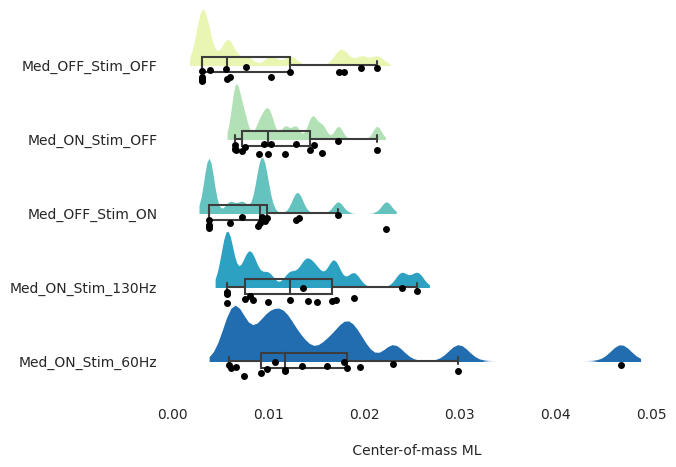

In [71]:
sns.set_style('white')
#palette = sns.cubehelix_palette(n_colors=5, start=1, rot=-.9, dark=0.3, light=0.7)
palette = sns.color_palette("YlGnBu")

ax = sns.violinplot(y="condition", x="COM_RMS_ML", data=temp,
                    palette=palette,
                    scale="width", inner=None, bw=.1, saturation=1, linewidth=0, width=1.5)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="condition", x="COM_RMS_ML", data=temp, saturation=1, showfliers=False,
            width=0.2, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)

old_len_collections = len(ax.collections)

sns.stripplot(y="condition", x="COM_RMS_ML", data=temp, color='black', ax=ax)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("\n Center-of-mass ML")
ax.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()